# 911 Emergency calls - Kaggle
## by Julien Both

## Preliminary Wrangling

> The data consists of information regarding 663522 Emergency Calls for Montgomery County, PA including latitude, longitude, description, zip, title, timestamp, commune and adress

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Gather

In [2]:
df = pd.read_csv("911.csv")

## Assess

In [3]:
print(df.shape)
df.head(10)

(663522, 9)


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
lat          663522 non-null float64
lng          663522 non-null float64
desc         663522 non-null object
zip          583323 non-null float64
title        663522 non-null object
timeStamp    663522 non-null object
twp          663229 non-null object
addr         663522 non-null object
e            663522 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


#### Quality
1. NaN Values bei zip
1. zip needs to be string
2. timestamp needs to be in datetime
3. title needs to be split to have categorical variable

## Clean

In [5]:
df_clean = df.copy()

**1. Delete NaN Values bei zip and change to string variable**

In [6]:
#Code
df_clean.dropna(inplace=True)

In [7]:
#Test
df_clean.shape

(583199, 9)

In [8]:
#Code
df_clean.zip = df_clean.zip.astype(str)
#Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583199 entries, 0 to 663521
Data columns (total 9 columns):
lat          583199 non-null float64
lng          583199 non-null float64
desc         583199 non-null object
zip          583199 non-null object
title        583199 non-null object
timeStamp    583199 non-null object
twp          583199 non-null object
addr         583199 non-null object
e            583199 non-null int64
dtypes: float64(2), int64(1), object(6)
memory usage: 44.5+ MB


**3. timestamp needs to be in datetime and new columns for month, day and hour**

In [9]:
#Code
df_clean.timeStamp = pd.to_datetime(df_clean.timeStamp)
df_clean['Month'] = df_clean['timeStamp'].apply(lambda time: time.month)
df_clean['DayofWeek'] = df_clean['timeStamp'].apply(lambda time: time.dayofweek)
df_clean['Day'] = df_clean['timeStamp'].apply(lambda time: time.day)
df_clean['Hour'] = df_clean['timeStamp'].apply(lambda time: time.hour)
df_clean['Year'] = df_clean['timeStamp'].apply(lambda time: time.year)

In [10]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df_clean['DayofWeek_abb'] = df_clean['DayofWeek'].map(dmap)
df_clean.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Month,DayofWeek,Day,Hour,Year,DayofWeek_abb
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,12,3,10,17,2015,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,12,3,10,17,2015,Thu


**4.title needs to be split to be categorical variable**

In [11]:
#Code
df_clean['reason'] = df_clean['title'].apply(lambda title: title.split(':')[0])
df_clean.reason = df_clean.reason.astype('category')

In [12]:
#Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583199 entries, 0 to 663521
Data columns (total 16 columns):
lat              583199 non-null float64
lng              583199 non-null float64
desc             583199 non-null object
zip              583199 non-null object
title            583199 non-null object
timeStamp        583199 non-null datetime64[ns]
twp              583199 non-null object
addr             583199 non-null object
e                583199 non-null int64
Month            583199 non-null int64
DayofWeek        583199 non-null int64
Day              583199 non-null int64
Hour             583199 non-null int64
Year             583199 non-null int64
DayofWeek_abb    583199 non-null object
reason           583199 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), int64(6), object(6)
memory usage: 71.7+ MB


### What is the structure of your dataset?

There are 583199 calls in this dataset with a lot of geographical data.

### What is/are the main feature(s) of interest in your dataset?

Main feature of this dataset is the new created column reason to investigate more time in

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The geographical specification as well as the datetime to see and which time what kind of incident happens.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

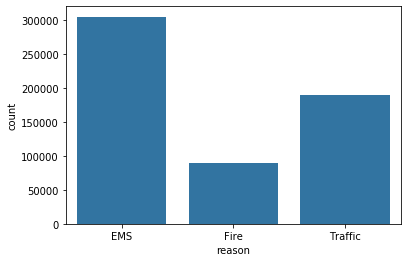

In [13]:
base_color = sns.color_palette()[0]
sns.countplot(x='reason',data=df_clean, color = base_color)

EMS has the most calls in the period, followed by traffic incidents and the least amount of emergency calls are fire classified

In [14]:
df_clean.twp.value_counts()

LOWER MERION     47487
ABINGTON         38137
NORRISTOWN       35881
POTTSTOWN        26837
CHELTENHAM       26647
                 ...  
BRYN ATHYN        1173
GREEN LANE         385
PHILA COUNTY       220
HATFIELD BORO      210
LEHIGH COUNTY      157
Name: twp, Length: 68, dtype: int64

In [45]:
len(df_clean.twp.value_counts()>10000)

68

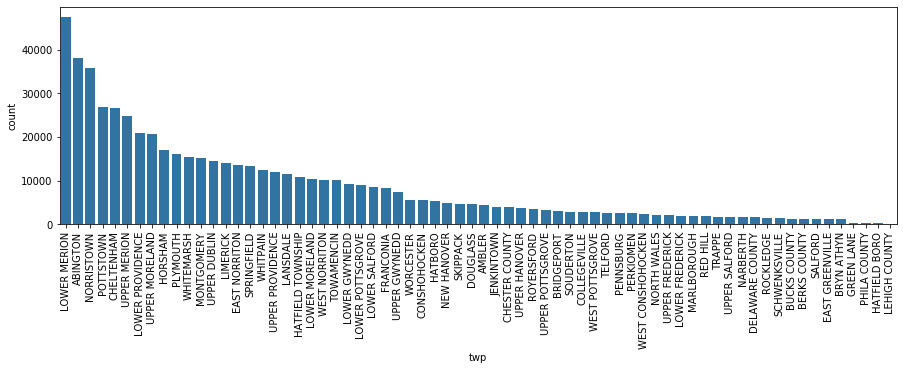

In [16]:
plt.figure(figsize= (15,4));
base_color = sns.color_palette()[0]
sns.countplot(x='twp',data=df_clean, color = base_color, order = df_clean['twp'].value_counts().index);
plt.xticks(rotation=90);

23 of the 68 communes had more than 10000 calls. Lower Merion has a huge gap the second one which is abington.

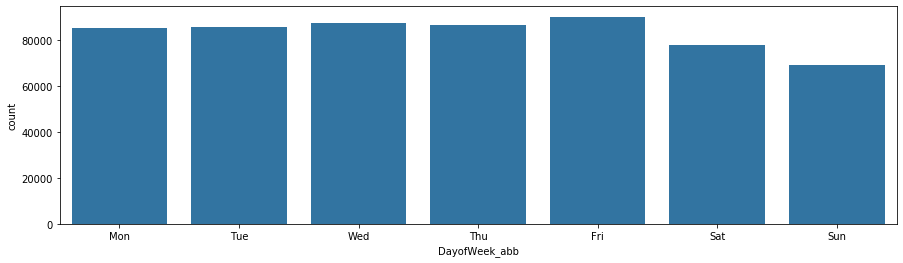

In [17]:
order_days = ["Mon","Tue","Wed", "Thu","Fri","Sat","Sun"]

plt.figure(figsize= (15,4));
base_color = sns.color_palette()[0]
sns.countplot(x='DayofWeek_abb',data=df_clean, color = base_color, order = order_days);


It looks like the amount of calls at the weekend is signficant lower than on week days.

In [18]:
df_clean['date']=df_clean['timeStamp'].apply(lambda t: t.date())

In [19]:
date_calls = df_clean.groupby('date').count()
date_calls

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Month,DayofWeek,Day,Hour,Year,DayofWeek_abb,reason
date,,,,,,,,,,,,,,,,
2015-12-10,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
2015-12-11,332,332,332,332,332,332,332,332,332,332,332,332,332,332,332,332
2015-12-12,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334
2015-12-13,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279
2015-12-14,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-25,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271
2020-07-26,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271
2020-07-27,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288


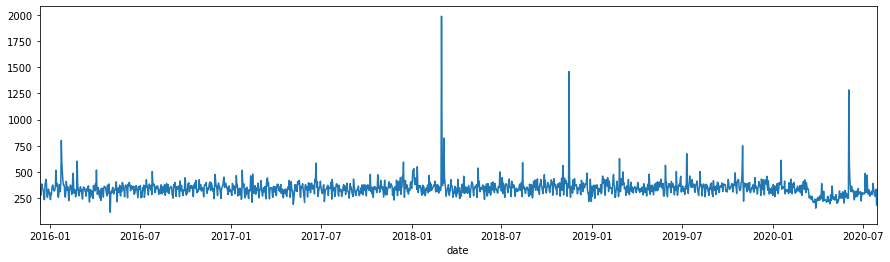

In [20]:
plt.figure(figsize= (15,4));
df_clean.groupby('date').count()['twp'].plot()
base_color = sns.color_palette()[0]

In Average there are between 250 and 500 calls a day. But there are three big outlier 02.03.2018, 15.11.2018 and 03.06.2020

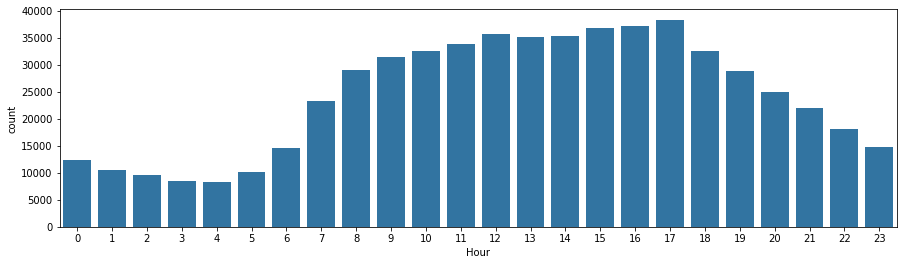

In [21]:
plt.figure(figsize= (15,4));
sns.countplot(data= df_clean, x ="Hour",color=base_color);

Interesting to see is that most of the calls are at daytime, especially in the afternoon hours. And than between 22-23 o'clock again.

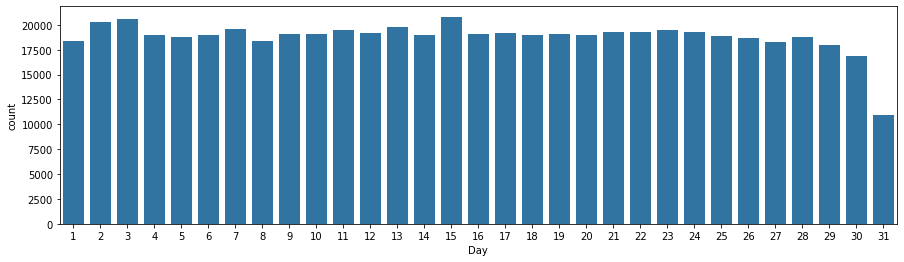

In [22]:
plt.figure(figsize= (15,4));
sns.countplot(data= df_clean, x ="Day",color=base_color);

Most of the calls are mid of the month and at the start of the month

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The most calls are for EMS emergencies and there are more calls on weekdays than on weekends. There were some days where the amount of calls was ten times the average rate. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Data wrangling process before the first visualisations where done completly. Just added a Date column to see the progress over time for the last plot.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

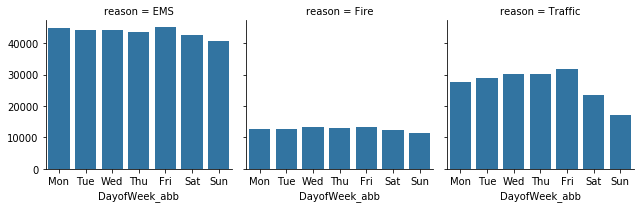

In [23]:
g = sns.FacetGrid(data = df_clean, col = "reason")
g.map(sns.countplot,'DayofWeek_abb', order=order_days)

Each reasons has the highest amount of emergency calls on friday. Traffic e-calls have a signifcant lower amount on weekends. EMS is close to constant. Fire calls are  on average 4 times less likely than EMS

In [24]:
reason_date =df_clean.groupby(['date',"reason"]).count()

In [25]:
reason_date.reset_index(inplace=True)

In [26]:
reason_date.head(6)

,date,reason,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Month,DayofWeek,Day,Hour,Year,DayofWeek_abb
0,2015-12-10,EMS,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
1,2015-12-10,Fire,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
2,2015-12-10,Traffic,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
3,2015-12-11,EMS,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166
4,2015-12-11,Fire,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
5,2015-12-11,Traffic,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107


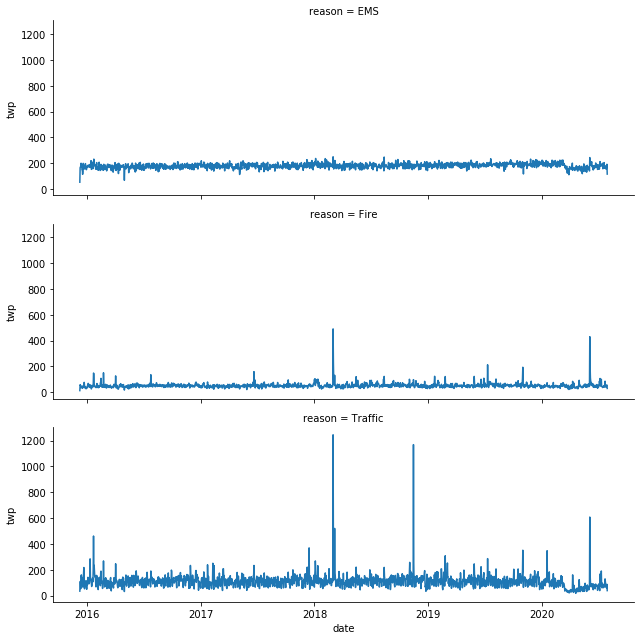

In [27]:
g = sns.FacetGrid(data = reason_date, row = "reason", height = 3, aspect = 3)
g.map(plt.plot,'date',"twp" )

As we can see in this diagram, the rapid increase of the emergency calls at the three days: 02.03.2018, 15.11.2018 and 03.06.2020 come from traffic accidents and two times in combination with fire alarm calls

In [28]:
dayHour = df_clean.groupby(by=['DayofWeek','Hour']).count()['reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayofWeek,,,,,,,,,,,,,,,,,,,,,
0,1661,1390,1238,1140,1184,1604,2265,3808,4785,5079,...,4985,5484,5561,5557,4765,3997,3460,2902,2346,1848
1,1547,1300,1202,1102,1111,1521,2350,3777,4821,4875,...,5248,5507,5611,6007,4887,4156,3445,3030,2408,1878
2,1518,1356,1150,1134,1038,1410,2218,3927,4713,4854,...,5358,5749,5880,6153,4978,4164,3661,3137,2511,1964
3,1530,1284,1276,1101,1156,1550,2394,3818,4599,4815,...,5331,5695,5577,5974,4855,4176,3609,3070,2507,2022
4,1751,1451,1311,1173,1226,1440,2248,3621,4411,4724,...,5596,6060,6088,6079,4945,4463,3856,3449,3048,2494


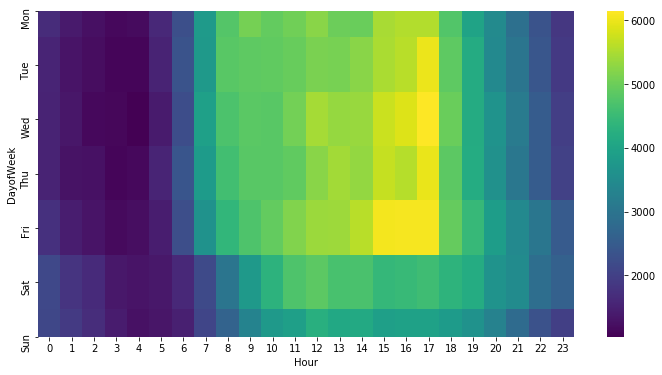

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis', yticklabels=order_days)

We can see here that on weekends the amount of calls are less than on weekdays and as already seen above the most calls happens between 16-17 o'clock

In [30]:
dayHour2 = df_clean.groupby(by=['Day','Hour']).count()['reason'].unstack()
dayHour2.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
1,513,408,353,282,281,321,467,781,942,988,...,1120,1140,1087,1099,1040,836,766,661,584,468
2,405,349,307,259,261,319,499,741,894,1019,...,1350,1389,1390,1426,1234,1014,868,783,596,576
3,459,374,310,278,277,348,512,856,1070,1082,...,1282,1311,1226,1281,1099,1030,919,814,621,486
4,475,367,320,304,264,337,515,810,914,987,...,1071,1106,1105,1178,1017,954,861,736,627,558
5,399,347,348,247,265,348,484,760,976,1006,...,1090,1155,1169,1316,1071,903,778,764,586,446


In [31]:
test = df_clean.query("reason=='Fire'").groupby(by=['Day','Hour']).count()['reason'].unstack()
test.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
1,98,95,68,47,37,50,55,130,131,147,...,156,186,165,164,184,131,138,112,86,77
2,70,50,50,42,47,50,62,84,117,152,...,199,249,225,237,242,182,167,145,106,118
3,91,66,54,49,51,63,65,122,134,178,...,216,208,205,196,189,211,198,168,102,86
4,77,63,51,59,53,51,81,119,122,145,...,163,149,152,187,166,193,178,129,123,94
5,69,58,52,44,38,44,69,78,141,151,...,173,143,160,191,206,179,130,138,103,80


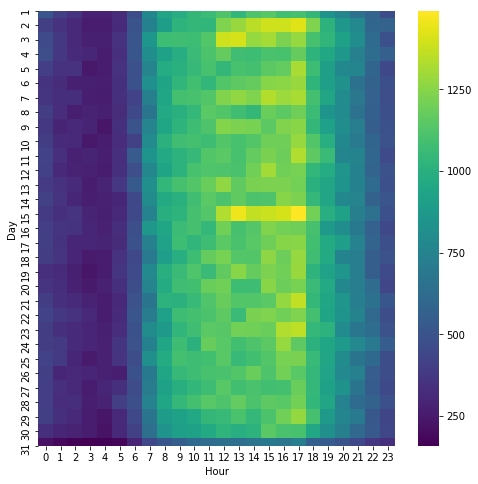

In [32]:
plt.figure(figsize=(8,8))
sns.heatmap(dayHour2,cmap='viridis')

As seen above at the beginning of the months as well as at day 15 are the most calls for emergency, 13 and 17 pm are most calls on 15 of the month

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Interesting to see is that the fire alarms are the least on every day. And it seems that there is sometimes a relationship between Fire and Traffic alarms

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [33]:
df_clean.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Month,DayofWeek,Day,Hour,Year,DayofWeek_abb,reason,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,12,3,10,17,2015,Thu,EMS,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,12,3,10,17,2015,Thu,EMS,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,12,3,10,14,2015,Thu,Fire,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,12,3,10,16,2015,Thu,EMS,2015-12-10
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,12,3,10,15,2015,Thu,EMS,2015-12-10


In [34]:
average_calls = df_clean.groupby(['Year',"Month","reason"]).count()
average_calls.reset_index(inplace=True)

In [35]:
average_calls.dropna(inplace=True)

In [36]:
average_calls.head()

,Year,Month,reason,lat,lng,desc,zip,title,timeStamp,twp,addr,e,DayofWeek,Day,Hour,DayofWeek_abb,date
33,2015,12,EMS,3537.0,3537.0,3537.0,3537.0,3537.0,3537.0,3537.0,3537.0,3537.0,3537.0,3537.0,3537.0,3537.0,3537.0
34,2015,12,Fire,957.0,957.0,957.0,957.0,957.0,957.0,957.0,957.0,957.0,957.0,957.0,957.0,957.0,957.0
35,2015,12,Traffic,2404.0,2404.0,2404.0,2404.0,2404.0,2404.0,2404.0,2404.0,2404.0,2404.0,2404.0,2404.0,2404.0,2404.0
36,2016,1,EMS,5544.0,5544.0,5544.0,5544.0,5544.0,5544.0,5544.0,5544.0,5544.0,5544.0,5544.0,5544.0,5544.0,5544.0
37,2016,1,Fire,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0


In [37]:
EMS_day_hour = df_clean.query("reason=='EMS'").groupby(by=['Day','Hour']).count()['reason'].unstack()

In [38]:
Fire_day_hour = df_clean.query("reason=='Fire'").groupby(by=['Day','Hour']).count()['reason'].unstack()

In [39]:
Traffic_day_hour = df_clean.query("reason=='Traffic'").groupby(by=['Day','Hour']).count()['reason'].unstack()

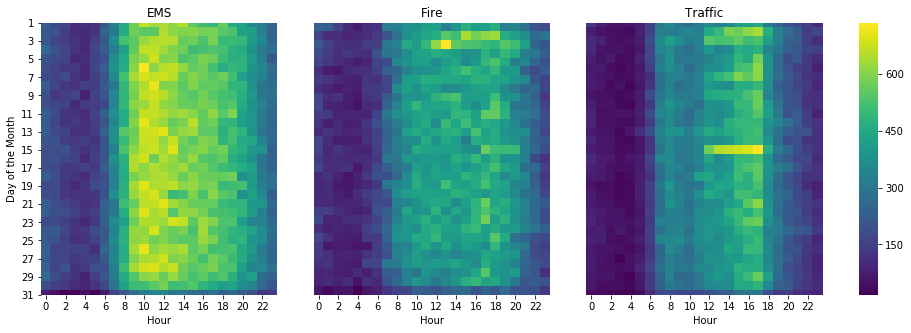

In [40]:
#plt.figure(figsize=(8,100))
f,(ax1,ax2,ax3, axcb) = plt.subplots(1,4, 
            gridspec_kw={'width_ratios':[1,1,1,0.08]}, figsize=(15,5))
ax1.get_shared_y_axes().join(ax2,ax3)
g1 = sns.heatmap(EMS_day_hour,cmap="viridis",cbar=False,ax=ax1)
g1.set_ylabel('Day of the Month')
g1.set_xlabel('Hour')
g1.set_title('EMS')
g2 = sns.heatmap(Fire_day_hour,cmap="viridis",cbar=False,ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('Hour')
g2.set_title('Fire')
g2.set_yticks([])
g3 = sns.heatmap(Traffic_day_hour,cmap="viridis",ax=ax3, cbar_ax=axcb)
g3.set_ylabel('')
g3.set_xlabel('Hour')
g3.set_title('Traffic')
g3.set_yticks([])

# may be needed to rotate the ticklabels correctly:
for ax in [g1,g2,g3]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

plt.show()

EMS calls increases at around 8 o'clock and has it peak between 10-12 am. There is no hugh different between the days of the month. Fire alarms seems to have a peak at the start of the month but is relativly constant. Traffic alarms havea  peak at 15th of the months in the afternoon hours.

In [41]:
EMS_dayofweek_hour = df_clean.query("reason=='EMS'").groupby(by=['DayofWeek','Hour']).count()['reason'].unstack()
Fire_dayofweek_hour = df_clean.query("reason=='Fire'").groupby(by=['DayofWeek','Hour']).count()['reason'].unstack()
Traffic_dayofweek_hour = df_clean.query("reason=='Traffic'").groupby(by=['DayofWeek','Hour']).count()['reason'].unstack()

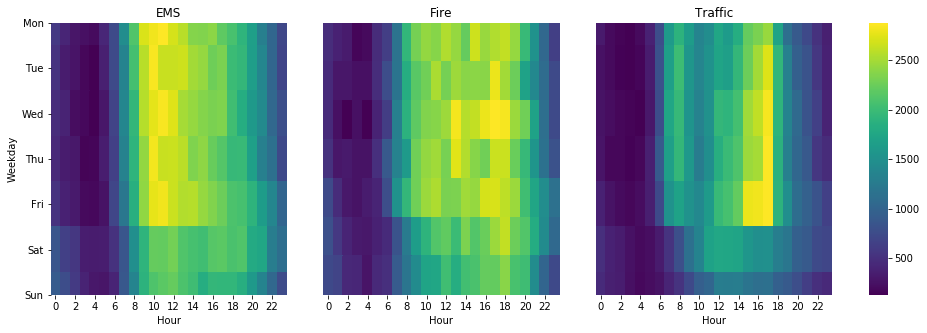

In [42]:
#sns.heatmap(EMS_dayofweek_hour,cmap='viridis', yticklabels=order_days)
f,(ax1,ax2,ax3, axcb) = plt.subplots(1,4, 
            gridspec_kw={'width_ratios':[1,1,1,0.08]}, figsize=(15,5))
ax1.get_shared_y_axes().join(ax2,ax3)
g1 = sns.heatmap(EMS_dayofweek_hour,cmap="viridis",cbar=False,ax=ax1, yticklabels=order_days)
g1.set_ylabel('Weekday')
g1.set_xlabel('Hour')
g1.set_title('EMS')
g2 = sns.heatmap(Fire_dayofweek_hour,cmap="viridis",cbar=False,ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('Hour')
g2.set_title('Fire')
g2.set_yticks([])
g3 = sns.heatmap(Traffic_dayofweek_hour,cmap="viridis",ax=ax3, cbar_ax=axcb)
g3.set_ylabel('')
g3.set_xlabel('Hour')
g3.set_title('Traffic')
g3.set_yticks([])

# may be needed to rotate the ticklabels correctly:
for ax in [g1,g2,g3]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In the multiveriate visualisation i wanted to see whether there is a difference for the three reason in terms of  the day of Month and the time of the day. As well as the same for the weekday and the different times

### Were there any interesting or surprising interactions between features?

Interesting to see is that EMS calls mostly happens shortly before noon on weekdays, Fire alarms have a high probability to happen wednesday between 14-18 o'clock. Traffic alarms are most likely fridays between 14-18. There are way less traffic alarms on weekends.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [44]:
df_clean.to_csv('911-clean.csv', encoding='utf-8', index=False)